<a href="https://colab.research.google.com/github/XineohpM/Computational_Physics_PHYS_411/blob/main/PHYS_411_HW5_Xiaoyue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 8.1

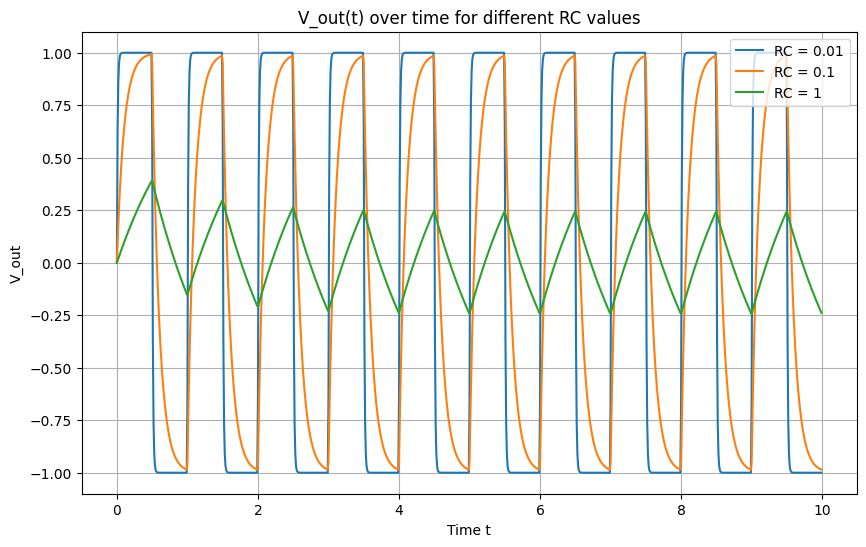

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
RC_values = [0.01, 0.1, 1]
t_start = 0  # s
t_end = 10   # s
h = 0.01     # s

def V_in(t):
    if np.floor(2 * t) % 2 == 0:
        return 1
    else:
        return -1

def dV_out_dt(t, V_out, RC):
    return (V_in(t) - V_out) / RC

def Runge_Kutta_4(V_out0, t_start, t_end, h, RC):
    t_points = np.arange(t_start, t_end, h)
    V_out_points = np.zeros(t_points.shape)
    V_out_points[0] = V_out0

    for i in range(1, len(t_points)):
        t = t_points[i - 1]
        V_out = V_out_points[i - 1]

        k1 = h * dV_out_dt(t, V_out, RC)
        k2 = h * dV_out_dt(t + 0.5*h, V_out + 0.5*k1, RC)
        k3 = h * dV_out_dt(t + 0.5*h, V_out + 0.5*k2, RC)
        k4 = h * dV_out_dt(t + h, V_out + k3, RC)

        V_out_next = V_out + (k1 + 2*k2 + 2*k3 + k4) / 6
        V_out_points[i] = V_out_next

    return t_points, V_out_points

plt.figure(figsize=(10, 6))

for RC in RC_values:
    t_points, V_out_points = Runge_Kutta_4(0, t_start, t_end, h, RC)
    plt.plot(t_points, V_out_points, label = f'RC = {RC}')

plt.title('V_out(t) over time for different RC values')
plt.xlabel('Time t')
plt.ylabel('V_out')
plt.legend()
plt.grid(True)
plt.show()

The circuit is indeed acting as a low-pass filter, with the RC value determining how much it smooths the square wave. A smaller RC value allows the square wave to pass with less smoothing. A larger RC value smooths the signal significantly, resulting in a gentle rise and fall instead of sharp square wave transitions. The circuit is effectively filtering out the high-frequency components of the input signal, more so as the RC value increases.

## Exercise 8.6

**(a)**

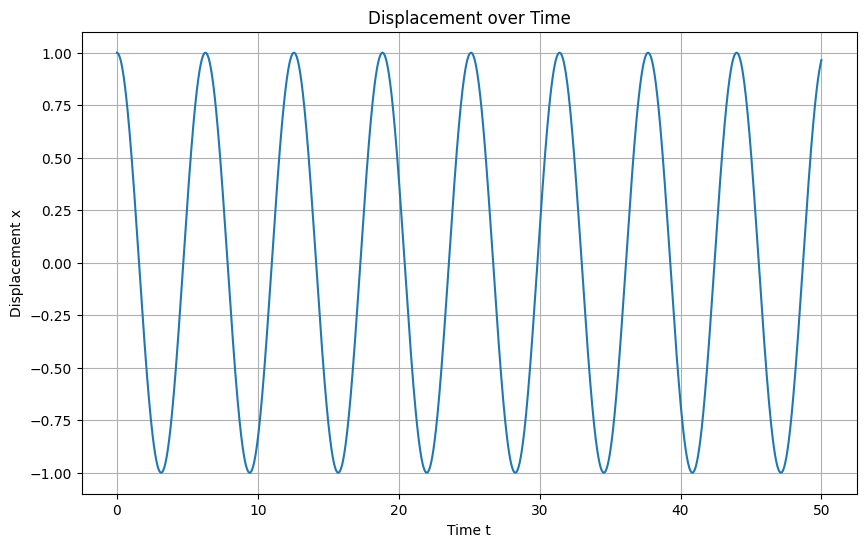

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
omega = 1
t_i = 0
t_f = 50
h = 0.01

# Initial conditions
x_0 = 1
v_0 = 0  # v = dx / dt

def f(t, y, omega):
    x, v = y
    dx_dt = v
    dv_dt = -(omega ** 2) * x
    return np.array([dx_dt, dv_dt])

def Runge_Kutta_4(y_0, t_i, t_f, h, f, omega):
    steps = int((t_f - t_i) / h) + 1
    t = np.linspace(t_i, t_f, steps)
    y = np.zeros((steps, len(y_0)))
    y[0] = y_0

    for i in range(steps - 1):
        k_1 = h * f(t[i], y[i], omega)
        k_2 = h * f(t[i] + h / 2, y[i] + k_1 / 2, omega)
        k_3 = h * f(t[i] + h / 2, y[i] + k_2 / 2, omega)
        k_4 = h * f(t[i] + h, y[i] + k_3, omega)

        y[i + 1] = y[i] + (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6

    return t, y

initial_conditions = [x_0, v_0]
t_arr, y_arr = Runge_Kutta_4(initial_conditions, t_i, t_f, h, f, omega)

plt.figure(figsize = (10, 6))
plt.plot(t_arr, y_arr[:, 0], label = 'x')
plt.title('Displacement over Time')
plt.xlabel('Time t')
plt.ylabel('Displacement x')
plt.grid(True)
plt.show()

**(b)**

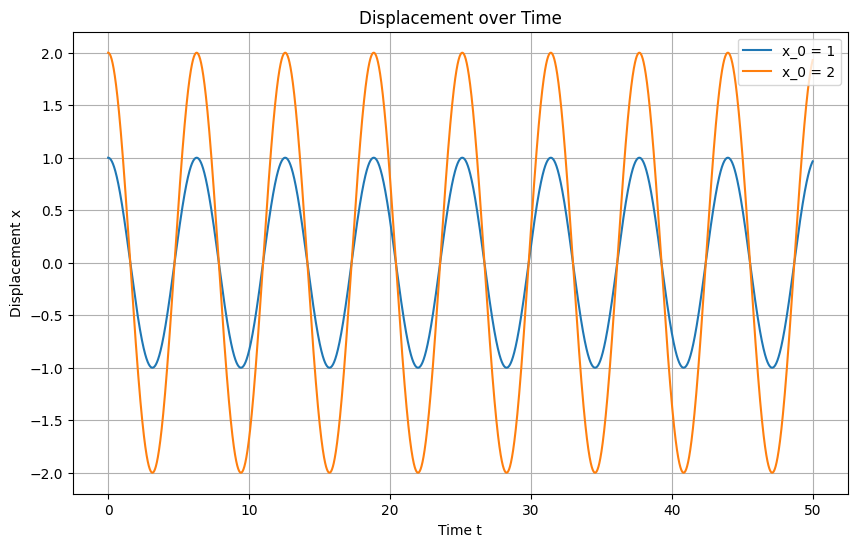

In [17]:
x_0_new = 2
initial_conditions = [x_0, v_0]
initial_conditions_new = [x_0_new, v_0]
t_arr, y_arr = Runge_Kutta_4(initial_conditions, t_i, t_f, h, f, omega)
t_arr_new, y_arr_new = Runge_Kutta_4(initial_conditions_new, t_i, t_f, h, f, omega)

plt.figure(figsize = (10, 6))
plt.plot(t_arr, y_arr[:, 0], label = 'x_0 = 1')
plt.plot(t_arr_new, y_arr_new[:, 0], label = 'x_0 = 2')
plt.legend()
plt.title('Displacement over Time')
plt.xlabel('Time t')
plt.ylabel('Displacement x')
plt.grid(True)
plt.show()

The overlapping plot shows that the period of the oscillations stays roughly the same.

**(c)**

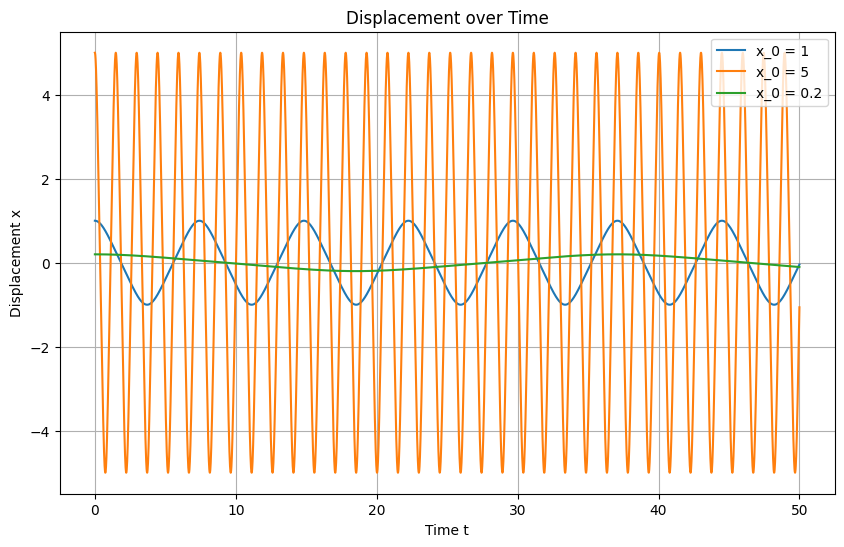

In [14]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
omega = 1
t_i = 0
t_f = 50
h = 0.01

# Initial conditions
x_0_original = 1
x_0_higher = 5
x_0_lower = 0.2
v_0 = 0  # v = dx / dt

def f(t, y, omega):
    x, v = y
    dx_dt = v
    dv_dt = -(omega ** 2) * (x ** 3)
    return np.array([dx_dt, dv_dt])

def Runge_Kutta_4(y_0, t_i, t_f, h, f, omega):
    steps = int((t_f - t_i) / h) + 1
    t = np.linspace(t_i, t_f, steps)
    y = np.zeros((steps, len(y_0)))
    y[0] = y_0

    for i in range(steps - 1):
        k_1 = h * f(t[i], y[i], omega)
        k_2 = h * f(t[i] + h / 2, y[i] + k_1 / 2, omega)
        k_3 = h * f(t[i] + h / 2, y[i] + k_2 / 2, omega)
        k_4 = h * f(t[i] + h, y[i] + k_3, omega)

        y[i + 1] = y[i] + (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6

    return t, y

initial_conditions_original = [x_0_original, v_0]
initial_conditions_higher = [x_0_higher, v_0]
initial_conditions_lower = [x_0_lower, v_0]

t_original, y_original = Runge_Kutta_4(initial_conditions_original, t_i, t_f, h, f, omega)
t_higher, y_higher = Runge_Kutta_4(initial_conditions_higher, t_i, t_f, h, f, omega)
t_lower, y_lower = Runge_Kutta_4(initial_conditions_lower, t_i, t_f, h, f, omega)

plt.figure(figsize = (10, 6))
plt.plot(t_original, y_original[:, 0], label = 'x_0 = 1')
plt.plot(t_higher, y_higher[:, 0], label = 'x_0 = 5')
plt.plot(t_lower, y_lower[:, 0], label = 'x_0 = 0.2')
plt.legend()
plt.title('Displacement over Time')
plt.xlabel('Time t')
plt.ylabel('Displacement x')
plt.grid(True)
plt.show()

**(d)**

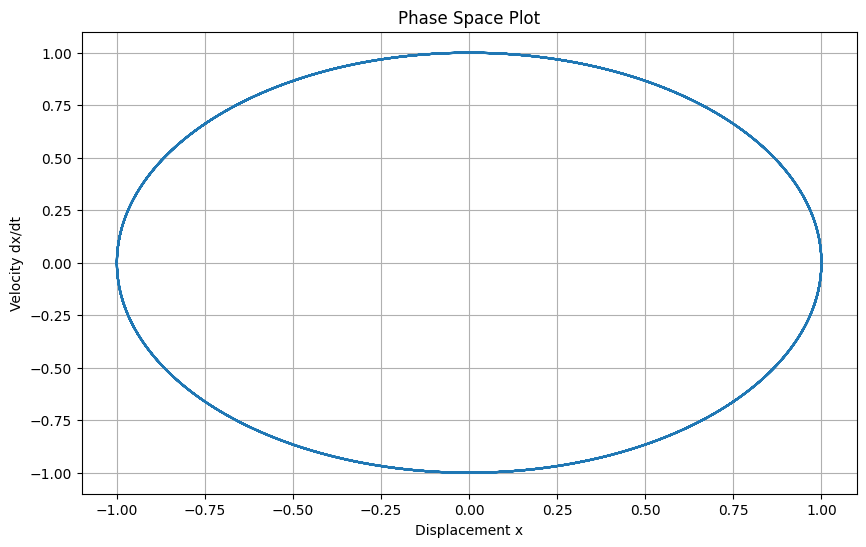

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
omega = 1
t_i = 0
t_f = 50
h = 0.01

# Initial conditions
x_0 = 1
v_0 = 0

# v = dx / dt
def f(t, y, omega):
    x, v = y
    dx_dt = v
    dv_dt = -(omega ** 2) * x
    return np.array([dx_dt, dv_dt])

def Runge_Kutta_4(y_0, t_i, t_f, h, f, omega):
    steps = int((t_f - t_i) / h) + 1
    t = np.linspace(t_i, t_f, steps)
    y = np.zeros((steps, len(y_0)))
    y[0] = y_0
    for i in range(steps - 1):
        k_1 = h * f(t[i], y[i], omega)
        k_2 = h * f(t[i] + h / 2, y[i] + k_1 / 2, omega)
        k_3 = h * f(t[i] + h / 2, y[i] + k_2 / 2, omega)
        k_4 = h * f(t[i] + h, y[i] + k_3, omega)
        y[i + 1] = y[i] + (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6
    return t, y

initial_conditions = [x_0, v_0]
t_arr, y_arr = Runge_Kutta_4(initial_conditions, t_i, t_f, h, f, omega)

plt.figure(figsize=(10, 6))
plt.plot(y_arr[:, 0], y_arr[:, 1])
plt.title('Phase Space Plot')
plt.xlabel('Displacement x')
plt.ylabel('Velocity dx/dt')
plt.grid(True)
plt.show()

**(e)**

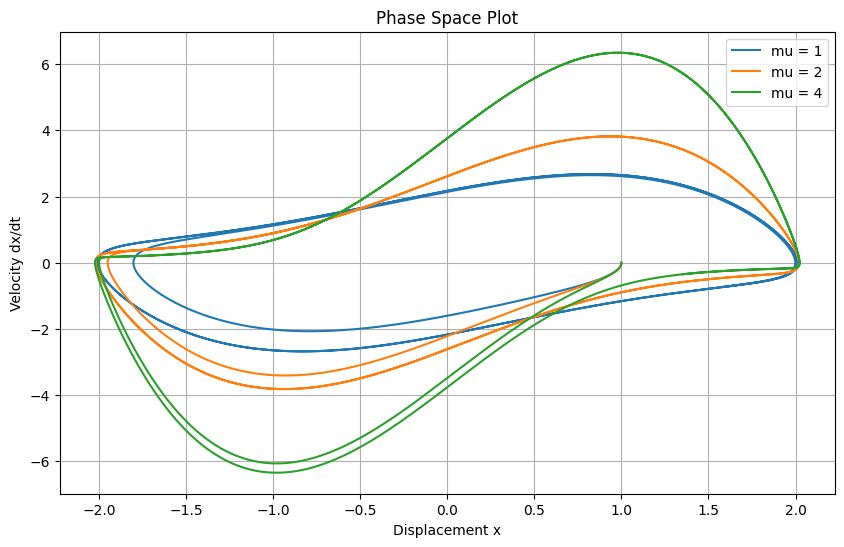

In [23]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
omega = 1
mu_arr = [1, 2, 4]
t_i = 0
t_f = 20
h = 0.001

# Initial conditions
x_0 = 1
v_0 = 0  # v = dx / dt

def f(t, y, omega, mu):
    x, v = y
    dx_dt = v
    dv_dt = mu * (1 - (x ** 2)) * v - ((omega ** 2) * x)
    return np.array([dx_dt, dv_dt])

def Runge_Kutta_4(y_0, t_i, t_f, h, f, omega, mu):
    steps = int((t_f - t_i) / h) + 1
    t = np.linspace(t_i, t_f, steps)
    y = np.zeros((steps, len(y_0)))
    y[0] = y_0

    for i in range(steps - 1):
        k_1 = h * f(t[i], y[i], omega, mu)
        k_2 = h * f(t[i] + h / 2, y[i] + k_1 / 2, omega, mu)
        k_3 = h * f(t[i] + h / 2, y[i] + k_2 / 2, omega, mu)
        k_4 = h * f(t[i] + h, y[i] + k_3, omega, mu)

        y[i + 1] = y[i] + (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6

    return t, y

initial_conditions = [x_0, v_0]
t_arr_0, y_arr_0 = Runge_Kutta_4(initial_conditions, t_i, t_f, h, f, omega, mu_arr[0])
t_arr_1, y_arr_1 = Runge_Kutta_4(initial_conditions, t_i, t_f, h, f, omega, mu_arr[1])
t_arr_2, y_arr_2 = Runge_Kutta_4(initial_conditions, t_i, t_f, h, f, omega, mu_arr[2])

plt.figure(figsize=(10, 6))
plt.plot(y_arr_0[:, 0], y_arr_0[:, 1], label = 'mu = 1')
plt.plot(y_arr_1[:, 0], y_arr_1[:, 1], label = 'mu = 2')
plt.plot(y_arr_2[:, 0], y_arr_2[:, 1], label = 'mu = 4')
plt.legend()
plt.title('Phase Space Plot')
plt.xlabel('Displacement x')
plt.ylabel('Velocity dx/dt')
plt.grid(True)
plt.show()

## Exercise 8.9

**(a)**

Input the number of identical masses:20


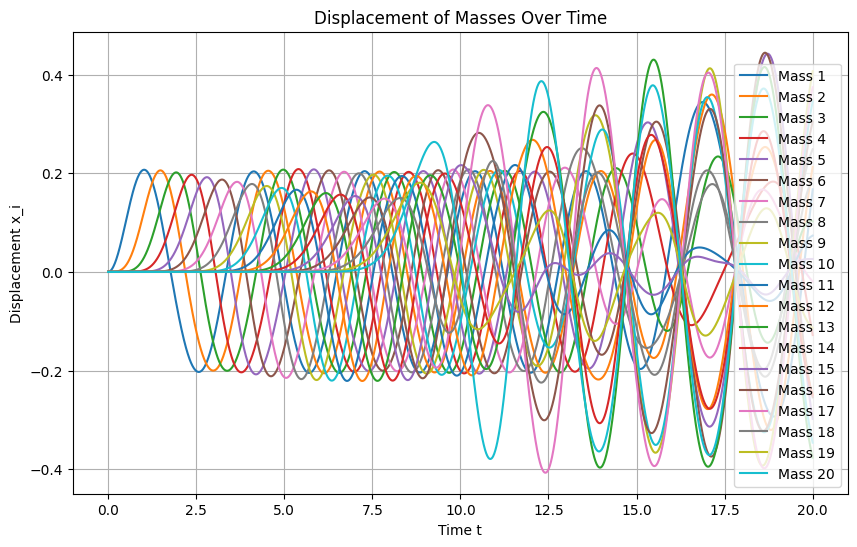

In [30]:
# Estimated run time: 10 s for N = 20
import numpy as np
import matplotlib.pyplot as plt


# Constants
m = 1
k = 6
omega = 2
t_i = 0
t_f = 20
h = 0.01
N = int(input("Input the number of identical masses:"))

def force(t):
    F = np.zeros(N)
    F[0] = np.cos(omega * t)
    return F

def f(t, r):
    dr_dt = np.zeros(2 * N)
    F = force(t)
    for i in range(N):  # The first N elements in r is x
        dr_dt[i] = r[N + i]  # Derivatives of x
        if i == 0:
            dr_dt[N + i] = (k / m) * (r[i+1] - r[i]) + (F[i] / m)  # Derivatives of v
        elif i == N - 1:
            dr_dt[N + i] = (k / m) * (r[i-1] - r[i]) + (F[i] / m)
        else:
            dr_dt[N + i] = (k / m) * (r[i+1] - 2 * r[i] + r[i-1]) + (F[i] / m)
    return dr_dt

def Runge_Kutta_4(f, y_0, t_i, t_f, h):
    t_steps = int((t_f - t_i) / h) + 1
    t = np.linspace(t_i, t_f, t_steps)
    y = np.zeros((t_steps, len(y_0)))
    y[0] = y_0

    for i in range(t_steps - 1):
        k_1 = h * f(t[i], y[i])
        k_2 = h * f(t[i] + h / 2, y[i] + k_1 / 2)
        k_3 = h * f(t[i] + h / 2, y[i] + k_2 / 2)
        k_4 = h * f(t[i] + h, y[i] + k_3)
        y[i+1] = y[i] + (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6

    return t, y

r_init = np.zeros(2 * N)
t_arr, y_arr = Runge_Kutta_4(f, r_init, t_i, t_f, h)

plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(t_arr, y_arr[:, i], label = f'Mass {i+1}')
plt.legend()
plt.title('Displacement of Masses Over Time')
plt.xlabel('Time t')
plt.ylabel('Displacement x_i')
plt.grid(True)
plt.show()

**(b)**

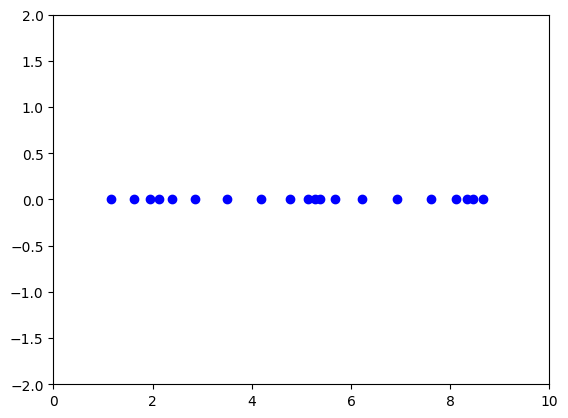

In [37]:
# Estimated run time: 33 s
import numpy as np
import matplotlib.pyplot as plt
from random import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
points, = ax.plot([], [], 'bo')

def init():
    points.set_data([], [])
    return points,

# Animation update function
def update(frame):
    # Assuming the masses are equally spaced initially along the x-axis
    x_data = np.linspace(1, 9, N) + y_arr[frame, :N]  # Adjust this depending on your actual setup
    y_data = np.zeros(N)  # All masses move horizontally, so y-values remain constant
    points.set_data(x_data, y_data)
    return points,

skip = 5
interval = 20

ani = FuncAnimation(fig, update, frames=range(0, len(t_arr), skip), init_func = init, blit = True, interval = interval)
video = ani.to_html5_video()
html = HTML(video)
display(html)

## Exercise 8.10

**(a)**
$$\begin{cases}\frac{\text{d} x}{\text{d} t} =v_{x}&\\ \frac{\text{d} v_{x}}{\text{d} t} =-GM\frac{x}{\left( x^{2}+y^{2}\right)^{\frac{3}{2} }  } &\\ \frac{\text{d} y}{\text{d} t} =v_{y}&\\ \frac{\text{d} v_{y}}{\text{d} t} =-GM\frac{y}{\left( x^{2}+y^{2}\right)^{\frac{3}{2} }  } &\end{cases} $$

**(b)**

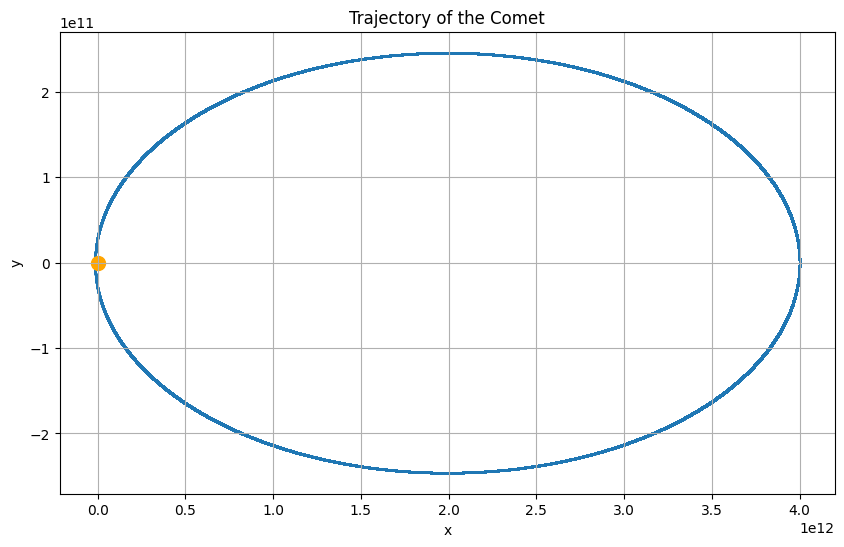

In [57]:
# Estimated run time: 20 s
import numpy as np
import matplotlib.pyplot as plt


# Constants
M = 1.98892e30 # kg
G = 6.6743e-11 # (m^3)*(kg^(-1))*(s^(-2))
h = 8000 # s
t_i = 0
t_f = 80 * 365.25 * 24 * 3600 # s

# Initialization
x_0 = 4e12 # m
y_0 = 0
v_x_0 = 0
v_y_0 = 500 # m*(s^(-1))
r_0 = np.array([x_0, v_x_0, y_0, v_y_0])

def f(t, r):
    x, v_x, y, v_y = r
    d = np.sqrt(x ** 2 + y ** 2)
    return np.array([v_x, -G * M * x / d ** 3, v_y, -G * M * y / d ** 3])

def Runge_Kutta_4(f, r_0, t_i, t_f, h):
    steps = int((t_f - t_i) / h)
    t = np.linspace(t_i, t_f, steps)
    r = np.zeros((steps, len(r_0)))
    r[0] = r_0
    for i in range(steps - 1):
        k_1 = h * f(t[i], r[i])
        k_2 = h * f(t[i] + h / 2, r[i] + k_1 / 2)
        k_3 = h * f(t[i] + h / 2, r[i] + k_2 / 2)
        k_4 = h * f(t[i] + h, r[i] + k_3)
        r[i + 1] = r[i] + (k_1 + 2*k_2 + 2*k_3 + k_4) / 6
    return t, r

t, r = Runge_Kutta_4(f, r_0, t_i, t_f, h)

# Plotting the trajectory of the comet
x, y = r[:, 0], r[:, 2]

plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 1)
plt.scatter([0], [0], color = 'orange', label = 'Sun', s = 100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Comet')
plt.grid(True)
plt.show()

**(c)**

<ipython-input-6-100b051167bc>:36: RuntimeWarning: divide by zero encountered in scalar divide
  rho = (target_accuracy / error) ** 0.25  # 1/4 for RK4


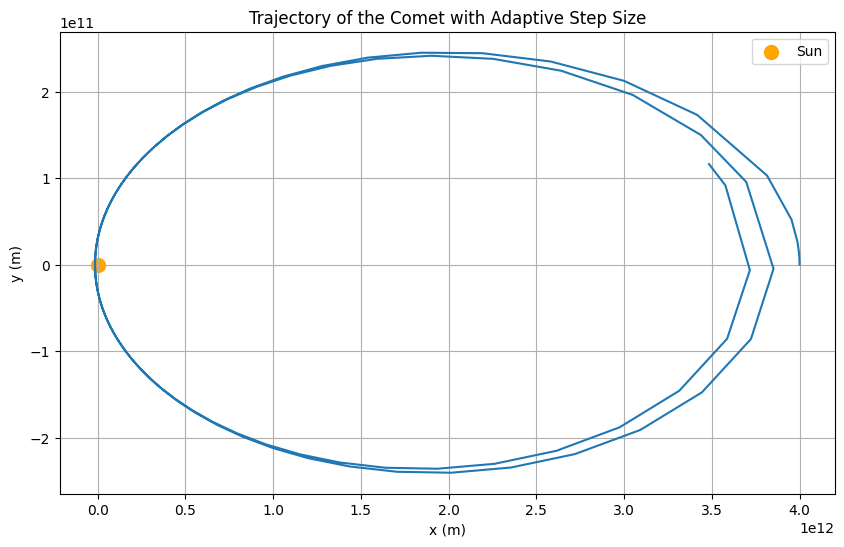

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = 1.98892e30  # kg,
G = 6.6743e-11  # m^3 kg^-1 s^-2
t_i = 0
t_f = 100 * 365.25 * 24 * 3600  # s

# Initialization
x_0 = 4e12  # m
y_0 = 0
v_x_0 = 0
v_y_0 = 500  # m/s

target_accuracy = 1000 / (3600 * 24 * 365.25) # can get good trajectory modifying delta to 1e-8

def f(t, r):
    x, v_x, y, v_y = r
    d = np.sqrt(x**2 + y**2)
    return np.array([v_x, -G * M * x / d**3, v_y, -G * M * y / d**3])

def adaptive_Runge_Kutta_4(f, r_0, t_i, t_f, h_init):
    t = [t_i]
    r = [r_0]
    h = h_init
    while t[-1] < t_f:
        if t[-1] + h > t_f:
            h = t_f - t[-1]

        r_1 = runge_kutta_step(f, t[-1], r[-1], h)
        r_2 = runge_kutta_step(f, t[-1], r[-1], h / 2)
        r_2 = runge_kutta_step(f, t[-1] + h / 2, r_2, h / 2)

        error = np.linalg.norm(r_1 - r_2) / max(np.linalg.norm(r_1), 1e-10)
        rho = (target_accuracy / error) ** 0.25  # 1/4 for RK4

        if rho >= 1:
            t.append(t[-1] + h)
            r.append(r_1)
            h *= min(max(rho, 0.8), 2.0)
        else:
            h *= max(rho, 0.1)
    return np.array(t), np.array(r)

def runge_kutta_step(f, t, r, h):
    k_1 = h * f(t, r)
    k_2 = h * f(t + h / 2, r + k_1 / 2)
    k_3 = h * f(t + h / 2, r + k_2 / 2)
    k_4 = h * f(t + h, r + k_3)
    return r + (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6

h_init = 100  # small initial stepsize to avoid diverging
t, r = adaptive_Runge_Kutta_4(f, np.array([x_0, v_x_0, y_0, v_y_0]), t_i, t_f, h_init)

x, y = r[:, 0], r[:, 2]
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.scatter([0], [0], color = 'orange', label = 'Sun', s = 100)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory of the Comet with Adaptive Step Size')
plt.grid(True)
plt.legend()
plt.show()

In **(c)**, the step size is variable and changes dynamically throughout the simulation, whereas, in **(b)**, the step size is fixed. Near the sun, where the gravitational forces cause rapid changes in the comet's velocity and direction, the adaptive method reduces the step size to increase accuracy. Far from the sun, it increases the step size to improve speed without sacrificing accuracy.

The adaptive step size RK4 method in **(c)** is significantly faster than fixed small step size for the entire calculation in **(b)**, since it allows larger steps to be taken when the comet is far from the sun, where less precision is needed due to smaller changes in velocity and position.

The adaptive step size aims to maintain a constant level of accuracy throughout the simulation. The error in the comet's position is controlled to be below a certain threshold ($1\ \text{km/year}$ in the position of the comet), which might be more precise than the fixed step size method if the fixed step size was not chosen small enough to handle the closest approach to the sun.

**(d)**

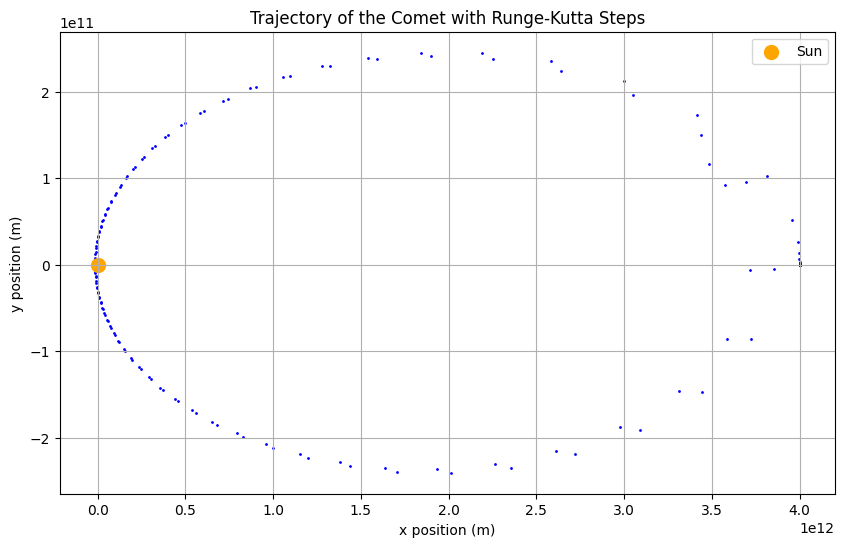

In [5]:
plt.figure(figsize=(10, 6))

for i in range(len(t)):
    plt.scatter(r[i, 0], r[i, 2], color = 'blue', s = 1)

plt.scatter([0], [0], color = 'orange', label = 'Sun', s = 100)
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Trajectory of the Comet with Runge-Kutta Steps')
plt.grid(True)
plt.legend()
plt.show()

## Exercise 8.11

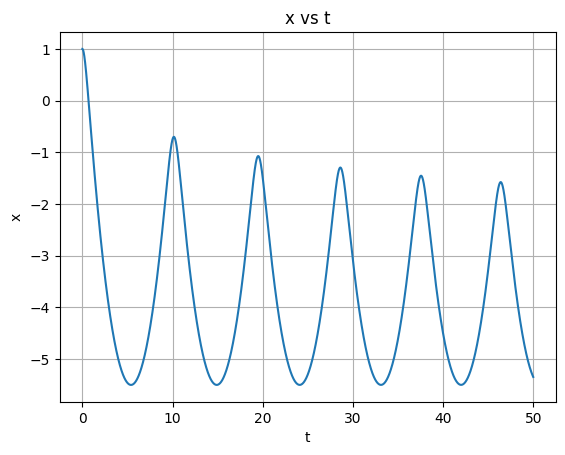

In [28]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
t_0 = 0
t_f = 50
h = 0.001
N = int((t_f - t_0) / h)

# Initial conditions
x = 1
v = 0

def leapfrog(x, v, h, N):
    t_points = np.arange(t_0, t_f, h)
    x_points = []
    v_points = []

    v += 0.5 * h * (v**2 - x - 5)

    for t in t_points:
        x += h * v
        v_half = v + 0.5 * h * (v ** 2 - x - 5)

        x_points.append(x)
        v_points.append(v_half)

        v = v_half + 0.5 * h * (v_half ** 2 - x - 5)

    return t_points, x_points, v_points

t_points, x_points, v_points = leapfrog(x, v, h, N)

plt.plot(t_points, x_points)
plt.title('x vs t')
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.show()

## Exercise 10.11

**(a)**

<ipython-input-10-1384639a6a01>:71: UserWarning: frames=<function frame_generate at 0x7f877ff2f6d0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=frame_generate, blit=True, interval=50)


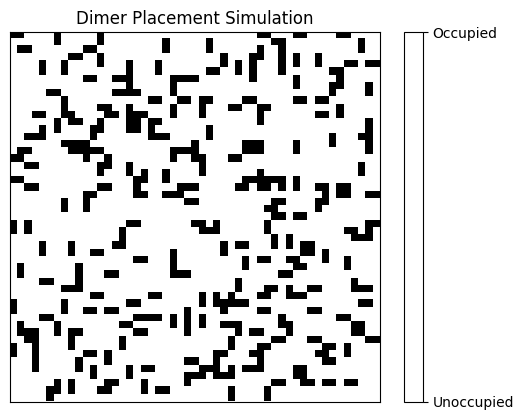

In [10]:
# Estimated run time: 70 s
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import matplotlib.colors as mcolors

# Constants
L = 50
T_start = 20
T_end = 1e-3
cooling_rate = 0.97
k = 100

lattice = np.zeros((L + 1, L + 1))

def rand_surrounding(x_1, y_1):
    while True:
        rand = np.random.random()
        if rand < 0.25:
            x_2, y_2 = x_1, y_1 + 1
        elif rand < 0.5:
            x_2, y_2 = x_1, y_1 - 1
        elif rand < 0.75:
            x_2, y_2 = x_1 + 1, y_1
        else:
            x_2, y_2 = x_1 - 1, y_1

        if 0 <= x_2 < L and 0 <= y_2 < L:
            return x_2, y_2

T = T_start
i = 1

def frame_generate():
    global T
    while T > T_end:
        yield
        T *= cooling_rate

def update(frame):
    global lattice, i
    x_1 = np.random.randint(0, L + 1)
    y_1 = np.random.randint(0, L + 1)
    x_2, y_2 = rand_surrounding(x_1, y_1)
    # Two sites are currently both empty
    if lattice[x_1][y_1] == 0 and lattice[x_2][y_2] == 0:
        lattice[x_1][y_1] = i
        lattice[x_2][y_2] = i
    # Two sites are currently occupied by a single dimer
    elif lattice[x_1][y_1] == lattice[x_2][y_2]:
        rand = np.random.random()
        if rand < np.exp(-1 / (k * T)):
            lattice[x_1][y_1] = 0
            lattice[x_2][y_2] = 0
    i += 1

    mat.set_data(lattice)

    return mat,

colors = ['white', 'black']
bounds = [0, 1, np.max(lattice)+1]
norm = mcolors.BoundaryNorm(bounds, len(colors))
cmap = mcolors.ListedColormap(colors)

fig, ax = plt.subplots()
mat = ax.matshow(lattice, cmap=cmap, norm=norm)
cbar = plt.colorbar(mat, ticks=[0, 1])
cbar.ax.set_yticklabels(['Unoccupied', 'Occupied'])
ani = FuncAnimation(fig, update, frames=frame_generate, blit=True, interval=50)
video = ani.to_html5_video()
html = HTML(video)
display(html)
plt.title('Dimer Placement Simulation')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

**(b)**

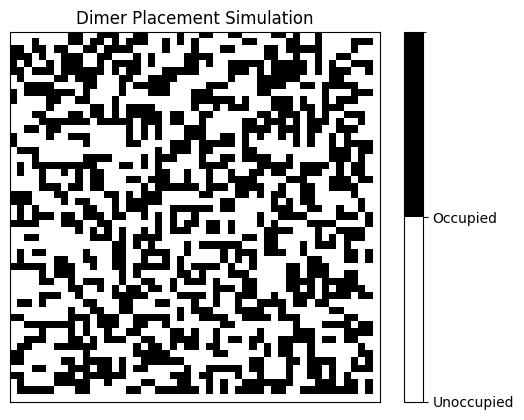

In [13]:
# Estimated run time: 1 min
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import matplotlib.colors as mcolors

# Constants
L = 50
T_start = 20
tau = 1000
cooling_rate = 0.97
k = 100

lattice = np.zeros((L + 1, L + 1))

def rand_surrounding(x_1, y_1):
    while True:
        rand = np.random.random()
        if rand < 0.25:
            x_2, y_2 = x_1, y_1 + 1
        elif rand < 0.5:
            x_2, y_2 = x_1, y_1 - 1
        elif rand < 0.75:
            x_2, y_2 = x_1 + 1, y_1
        else:
            x_2, y_2 = x_1 - 1, y_1

        if 0 <= x_2 < L and 0 <= y_2 < L:
            return x_2, y_2

T = T_start
i = 1

# Run simulation until i exceeds tau
while i <= tau:
    x_1 = np.random.randint(0, L)
    y_1 = np.random.randint(0, L)
    x_2, y_2 = rand_surrounding(x_1, y_1)
    if lattice[x_1, y_1] == 0 and lattice[x_2, y_2] == 0:
        lattice[x_1, y_1] = lattice[x_2, y_2] = i  # Marking both sites with the same id
    elif lattice[x_1, y_1] == lattice[x_2, y_2]:
        if np.random.random() < np.exp(-1 / (k * T)):
            lattice[x_1, y_1] = lattice[x_2, y_2] = 0  # Remove dimers
    i += 1
    T *= cooling_rate  # Cooling temperature

# Setup color mapping
colors = ['white', 'black']
bounds = [0, 1, np.max(lattice) + 1]
norm = mcolors.BoundaryNorm(bounds, len(colors))
cmap = mcolors.ListedColormap(colors)

# Create plot
fig, ax = plt.subplots()
mat = ax.matshow(lattice, cmap=cmap, norm=norm)
cbar = plt.colorbar(mat, ticks=[0, 1])
cbar.ax.set_yticklabels(['Unoccupied', 'Occupied'])
plt.title('Dimer Placement Simulation')
ax.set_xticks([])
ax.set_yticks([])
plt.show()